## Box Plot

The box plot, also called a box-and-whisker plot, graph that summarises numerical data based on quartiles which divide the data set into fourths.
It is a compact distribution summary which takes up less space than a histogram and contains less information but it is great for comparing groups. It shows the spread of all the different data points. 

## 1. Summarise the history of the box plot and situations in which it used

### a. History of the box plot
Box plots were invented by John Tukey in 1970, but it wasn't until his publication in 1977, "Exploratory Data Analysis", that they became widely known. Here is an example from his publication where he analysed the annual household per capita expenditures between the seven Vietnamese regions.

Example from his book:
![boxplot_jtukey](boxplot_jtukey.png)

### b. Situations in which it used

Box plots are good for comparison because the distribution is immediately clear. It is often used in explanatory data analysis. They are useful when categorial data is available. Categorical variables represent types of data which may be divided into groups. For example race, sex, age group, and educational level.

Box plots are made up of five components:

- Median
- upper quartile
- lower quartile
- whiskers
- outliers

Basic example of a box plot

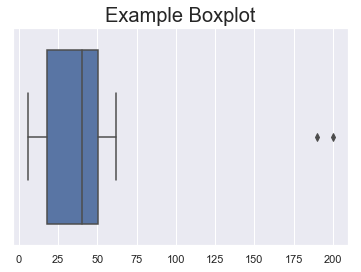

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#data to plot
data = [51, 17, 25, 39, 7, 49, 62, 41, 20, 6, 43, 13,190, 200]

# make the box plot
ax = sns.boxplot(x=data)

#title
ax.set_title('Example Boxplot',fontsize=20)
ax

-----
## 2. Demonstrate the use of the box plot using data of your choosing

I selected a data set from data.gove.ie about rainfall in Dungarvan published by Met Éireann. There are 670 rows of data available. Here is a link to the website: https://data.gov.ie/dataset/dungarvan-clonea-rainfall-data

The csv file is available here: https://cli.fusio.net/cli/climate_data/webdata/dly2007.csv or here: https://raw.githubusercontent.com/RitRa/Box-Plot-Project/master/data/dly2007.csv

Data: Dungarvan (Clonea) Rainfall Data
Station Name: BENNETTSBRIDGE G.S.	
Station Height: 37 M	
Latitude: 52.587	
Longitude: -7.183
- date:  1995 to 1997
- rain: Precipitation Amount (mm)	
- ind:  Indicator	



Using this dataset, I use box plot to compare:
1. Rainfall by Year and analyse what year the most rain fell.
2. Rainfall by Month and analyse what month the most rain fell.

In [2]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# setting the palette for the plots
sns.set(style='darkgrid', palette='deep')


First step is to view the data

In [3]:
# read the csv from the url
# we need to skip the first 9 rows as it is full of notes
df = pd.read_csv("https://raw.githubusercontent.com/RitRa/Box-Plot-Project/master/data/dly2007.csv",skiprows=9)
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html

# convert date column to date time 
df['date'] = pd.to_datetime(df['date'])
# a look at the top 10 rows
df.head(10)

,date,ind,rain
0,1995-11-01,0,0.0
1,1995-11-02,0,0.0
2,1995-11-03,0,0.9
3,1995-11-04,0,5.9
4,1995-11-05,4,0.0
5,1995-11-06,0,5.1
6,1995-11-07,0,1.6
7,1995-11-08,0,7.9
8,1995-11-09,0,6.2
9,1995-11-10,0,5.8


### Preparing the Data
From the date column, I generate new columns for analysis using dt.strftime.
- Month
- Year
- Month, Year

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.strftime.html

In [4]:

# Set the datetime column as the index
df.index = df['date'] 

# create a new column for month
df['month'] = df['date'].dt.strftime('%b')

# create a new column for year
df['year'] = df['date'].dt.strftime('%Y')

# create a new column for month and year together
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.to_period.html
df['month_year'] = df.date.dt.to_period('M')

# a look at the top 5 rows
df.head(5)

,date,ind,rain,month,year,month_year
date,,,,,,
1995-11-01,1995-11-01,0,0.0,Nov,1995,1995-11
1995-11-02,1995-11-02,0,0.0,Nov,1995,1995-11
1995-11-03,1995-11-03,0,0.9,Nov,1995,1995-11
1995-11-04,1995-11-04,0,5.9,Nov,1995,1995-11
1995-11-05,1995-11-05,4,0.0,Nov,1995,1995-11


### Descriptive Statistics
Using the year column, I can group the data by years and analyse the descriptive statistics.

From the descriptive statistics we can see that:
- 1995 has the least number of data points collected
- The average rainfall (mean) is higher in 1995
- 1997 had the most at 89.6mm


In [5]:
# group by year
# Describing a column, rain, from a DataFrame by accessing it as an attribute.
print(df.groupby('year').rain.describe())

      count      mean       std  min  25%  50%  75%   max
year                                                     
1995   61.0  4.585246  8.028155  0.0  0.0  0.7  5.8  36.8
1996  366.0  3.359836  6.395919  0.0  0.0  0.3  3.5  38.0
1997  243.0  2.975720  8.755821  0.0  0.0  0.1  2.6  89.6


### Rainfall analysis  by year
Using Seaborn, we can plot the 3 years side-by-side for a quick comparison. 
https://seaborn.pydata.org/generated/seaborn.boxplot.html

1995 had the most rainfall, you can see from the box plot that there is a greater spread hence the whiskers are the longest and the median line in the box is much higher than the other years. 1996 has many extreme outliers. 1997 has the most compact box plot and a very low median, the least amount of rain fell during this year.


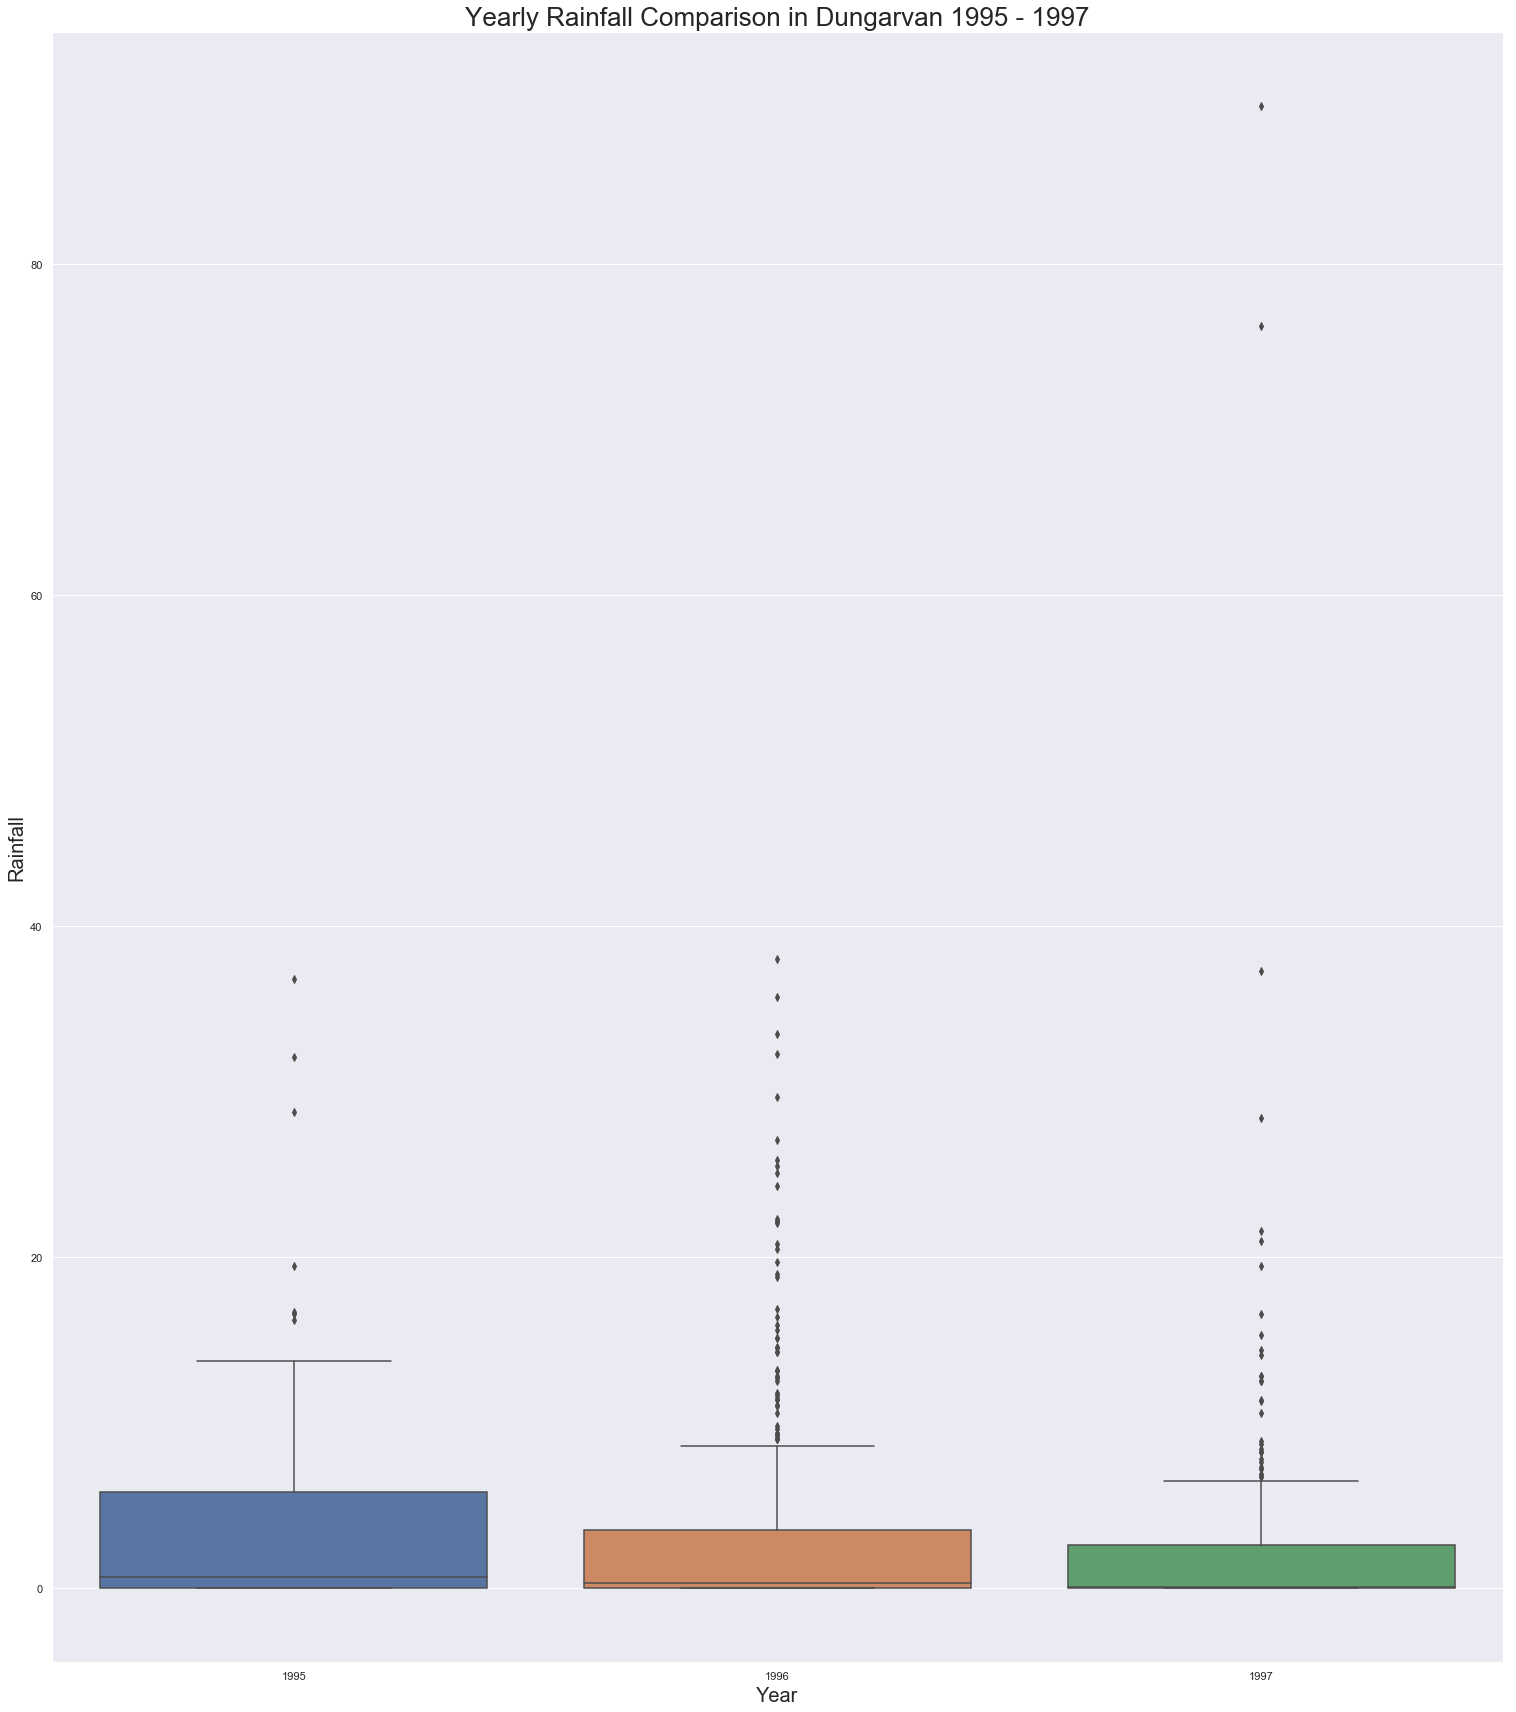

In [6]:
%matplotlib inline

fig, ax = plt.subplots()
fig.set_size_inches((26,30))

# using seaborn boxplot  to plot year on the x and rainfall on the y
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
plot = sns.boxplot(x='year', y ='rain', data=df)

plot.set_title('Yearly Rainfall Comparison in Dungarvan 1995 - 1997',fontsize=26)
plot.set_ylabel('Rainfall',fontsize=20)
plot.set_xlabel('Year',fontsize=20)

plt.show()

### Rainfall analysis by month
Here is the breakdown over the months Nov, 1995 to August, 1997. It is alot more interesting than the breakdown over the years. Each monthly rainfall varies alot. Comparing the rainfall in the months of April, 1996 to April, 1997, 1996 had about 8mm and 1997 had less than 1mm. There 

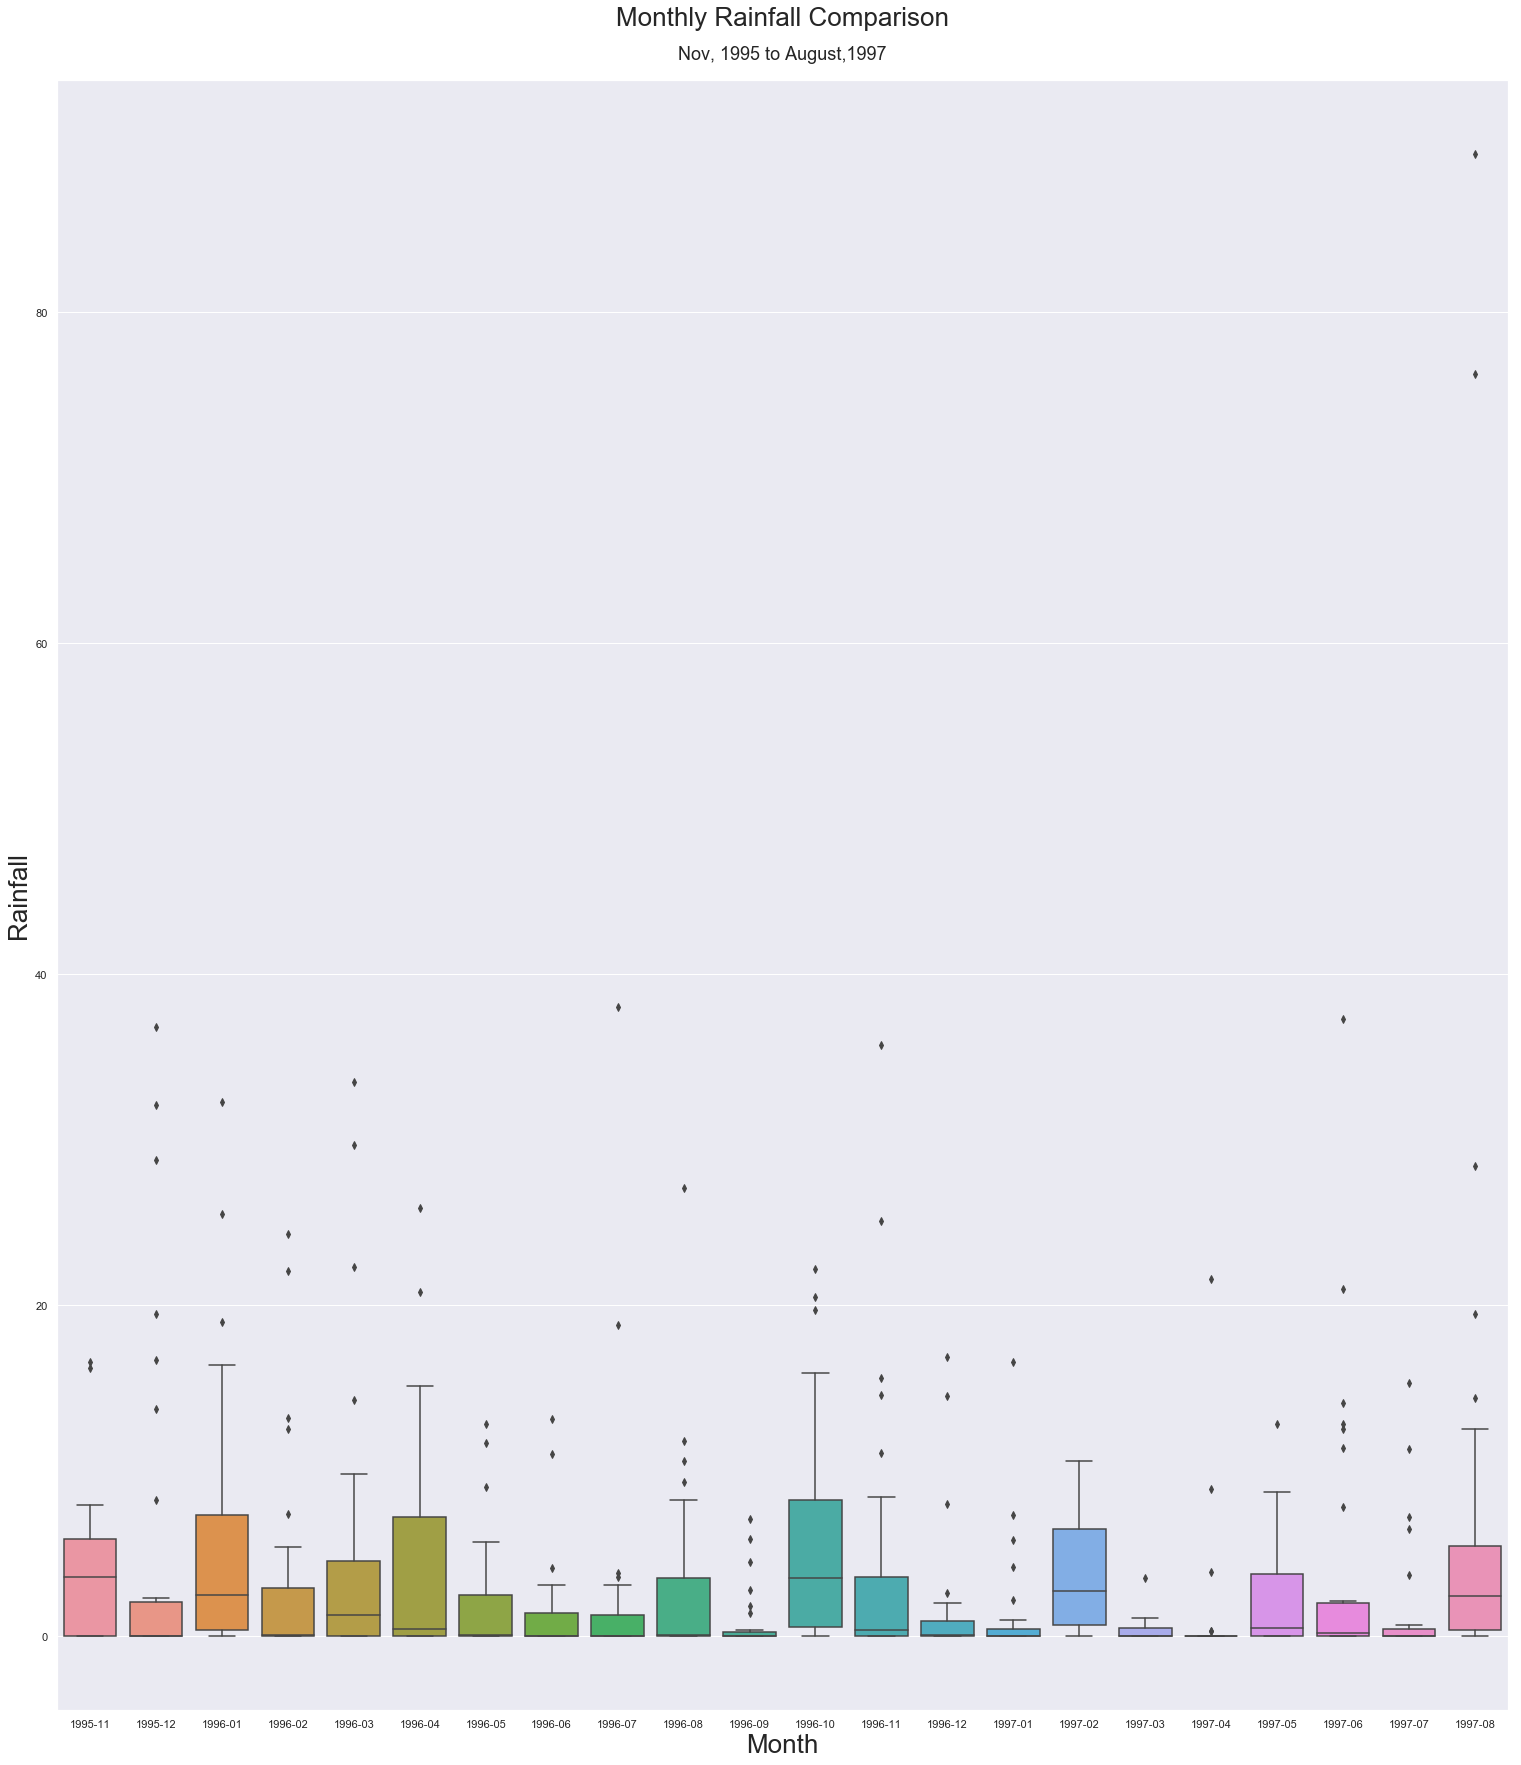

In [7]:
%matplotlib inline

#fig, ax = plt.subplots()
#fig.set_size_inches((26,30))
fig, ax = plt.subplots(figsize=(26,30))

plot = sns.boxplot(x='month_year', y ='rain', data=df, ax=ax)

# Giving the plot a title 
ax.text(x=0.5, y=1.03, s='Monthly Rainfall Comparison', fontsize=26,  ha='center', va='bottom', transform=ax.transAxes)
# Giving the plot a subtitle
ax.text(x=0.5, y=1.01, s='Nov, 1995 to August,1997', fontsize=18,  ha='center', va='bottom', transform=ax.transAxes)

# labelling the axes
ax.set_ylabel('Rainfall',fontsize=26)
ax.set_xlabel('Month',fontsize=26)

plt.show()

----------
## 3. Explain any relevant terminology such as the terms quartile and percentile.

![boxplot_terminiology](boxplotexample.png)

Box plots are made up of:

- Median
- whiskers
- Inter-quartile range
- upper quartile
- lower quartile
- outliers

###  Median

The median is the value separating the higher half from the lower half of a data sample, middle of the dataset. It is shown as the dark line dividing the box. 

For more info https://docs.scipy.org/doc/numpy/reference/generated/numpy.median.html

In [8]:
# what is the median of the dataset
np.median(df['rain'])

0.25

### Whiskers
Shows the full spread of all the data. They show the highest(upper whisker) and lowest points (lower whisker).

### Inter-quartile range
The middle box represents 50% of the data. The range of data from lower to upper quartile is referred to as the inter-quartile range. 

### Upper Quartile
Seventy-five percent of the data fall below the upper quartile. Between the end of the box and the upper whisker.

### Lower Quartile
Twenty-five percent of the data fall below the upper quartile. Between the bottom of the box and the lower whisker.

### Outlier
Outliers beyond whiskers represent the extremes. They are usually treated as abnormal values usually representing very high or very low values. In a Tukey box plot values outside 1.5 times the inter-quartile from the first or third quartile would be considered as outliers and displayed as simple points.

------
## 4. Compare the box plot to alternatives.

The beauty of the boxplot is that it was designed so that any statistican could draw them by hand but as technology has developed we can look at more complex ways to show distributions in the similar compact form of a box plot.
Here are some alternatives to the boxplot include:

- Histogram
- The Violin plot
- Boxenplot/Letter-value-plot
- Strip plot
- Swarm Plot 


### Histogram

Histograms are great at showing the spread of data. It can be difficult to see what is happening when the data is on one plot. When the are plotted side-by-side, it is easier to see the differences in the data.

To plot a histogram in Seaborn use: sns.distplot 

Documentation: https://seaborn.pydata.org/generated/seaborn.distplot.html

In [21]:
# segmenting the dataset in years
df1995 = df[(df['year'] == '1995')]
df1996 = df[(df['year'] == '1996')]
df1997 = df[(df['year'] == '1997')]

All in one plot

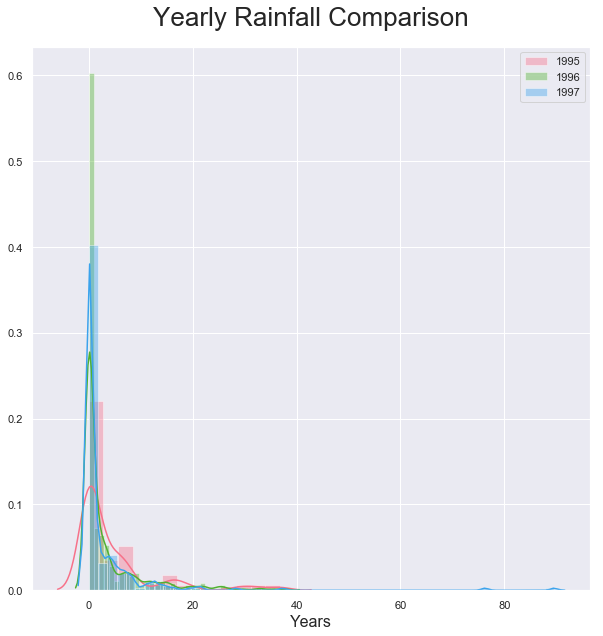

In [22]:
%matplotlib inline

# Set context to `"paper"`
# sns.set_context("paper", font_scale=3, rc={"font.size":8,"axes.labelsize":5})
fig, ax = plt.subplots(figsize=(10,10))
#ax = sns.dist(x='year', y ='rain', data = df1995)
x = df1995['rain']
y = df1996['rain']
z = df1997['rain']

#plotting the data and using label for the legend
plot = sns.distplot(x, label='1995', ax=ax)
plot = sns.distplot(y, label='1996',ax=ax)
plot = sns.distplot(z, label='1997', ax=ax)

# Giving the plot a title and a subtitle
ax.text(x=0.5, y=1.03, s='Yearly Rainfall Comparison', fontsize=26,  ha='center', va='bottom', transform=ax.transAxes)

# labelling the axes
ax.set_xlabel('Years',fontsize=16)
sns.set_palette("husl",3) 
# to show the legend
plt.legend()

# to show the plot
plt.show()

Plotting 3 histograms side by side for a better comparison

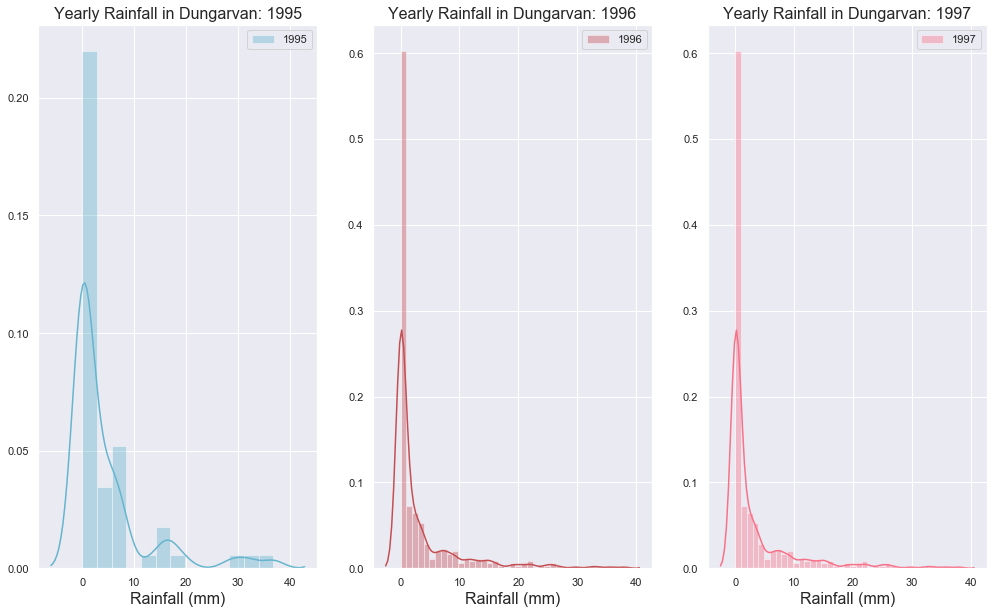

In [23]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#df1995 = df[(df['year'] == '1995')]
#df1996 = df[(df['year'] == '1996')]
#df1997 = df[(df['year'] == '1997')]
x = df1995['rain']
y = df1996['rain']
z = df1997['rain']


fig, ax = plt.subplots(1,3, figsize=(17,10))

plot = sns.distplot(x,color="c", label="1995", ax=ax[0])
plot2 = sns.distplot(y, color="r", label="1996", ax=ax[1])
plot3 = sns.distplot(y, label="1997",ax=ax[2])

# title
plot.set_title('Yearly Rainfall in Dungarvan: 1995',fontsize=16)
plot2.set_title('Yearly Rainfall in Dungarvan: 1996',fontsize=16)
plot3.set_title('Yearly Rainfall in Dungarvan: 1997',fontsize=16)

#labals
plot.set_xlabel('Rainfall (mm)',fontsize=16)
plot2.set_xlabel('Rainfall (mm)',fontsize=16)
plot3.set_xlabel('Rainfall (mm)',fontsize=16)

# legend
plot.legend()
plot2.legend()
plot3.legend()

### The Violin Plot

Categorical distribution plots

The Violin plot is closely related to Tukey's boxplot. The violin plot combines the box plot with a kernel density estimation (KDE) of the underlying distribution. This can be useful if you want to visualize just the “shape” of some data. A Violin plot is more informative than a plain box plot as it shows the full distribution of data.


There are two modifications: the box plot is black and the median line is replaced with a circle. Outliers are contained within the kernel density estimation. They are a visually pleasing way of representing your data.

To plot a Violinplot in Seaborn use: sns.violinplot()

More examples here: https://seaborn.pydata.org/generated/seaborn.violinplot.html


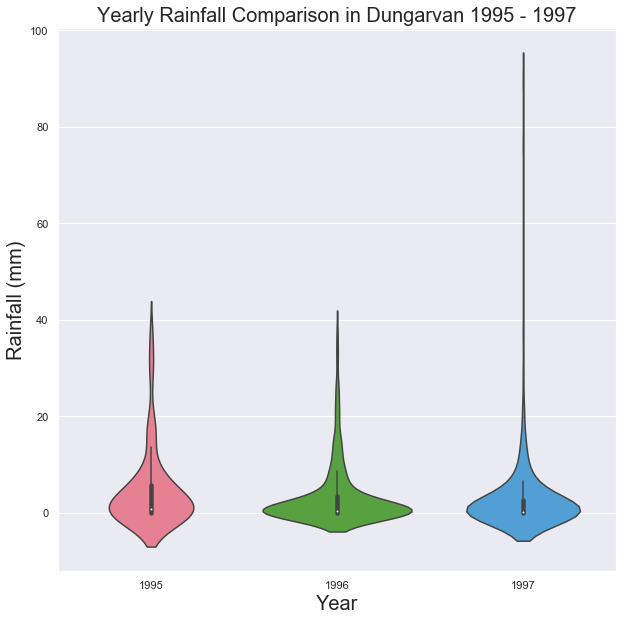

In [24]:
%matplotlib inline

fig, ax = plt.subplots()

#size
fig.set_size_inches((10,10))

#plot the violinpolt
plot = sns.violinplot(x='year', y ='rain', data=df)

#title
plot.set_title('Yearly Rainfall Comparison in Dungarvan 1995 - 1997',fontsize=20)
#y axis label
plot.set_ylabel('Rainfall (mm)',fontsize=20)
# x axis label
plot.set_xlabel('Year',fontsize=20)

#show plot
plt.show()

### Boxenplot/Letter-value-plot

In the 2010 paper "40 years of boxplots", The Boxenplot/letter-value boxplot was created to work with larger datasets. "Large datasets (n = 10,000 100,000) yield much more reliable estimates about the behavior beyond the quartiles. The simple boxplot is not a good method for large datasets, since there is often too much over-plotting in the outlier region."

Reference: http://had.co.nz/stat645/project-03/boxplots.pdf

To plot the Boxenplot in Seaborn use: sns.boxenplot()

Documentation: https://seaborn.pydata.org/generated/seaborn.boxenplot.html

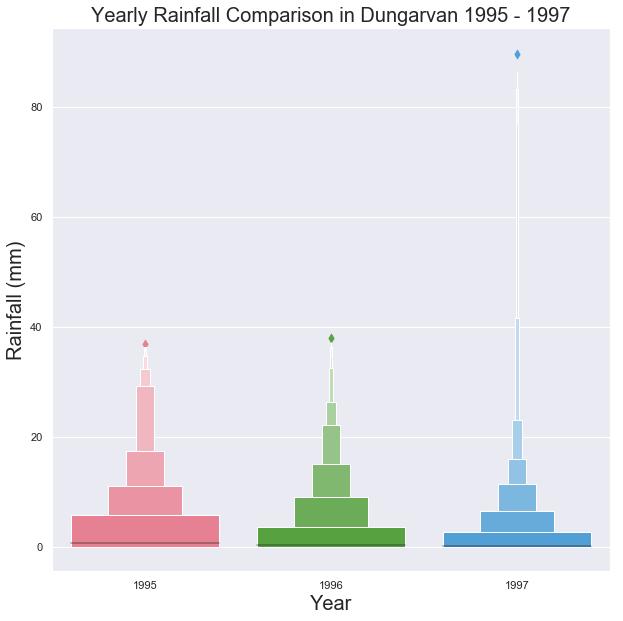

In [25]:
%matplotlib inline

fig, ax = plt.subplots()

# plot size
fig.set_size_inches((10,10))

#plot boxenplot
plot = sns.boxenplot(x='year', y ='rain', data=df)

# title
plot.set_title('Yearly Rainfall Comparison in Dungarvan 1995 - 1997',fontsize=20)

#labels
plot.set_ylabel('Rainfall (mm)',fontsize=20)
plot.set_xlabel('Year',fontsize=20)

# show pot
plt.show()

### Strip plot and Swarm plot

These are known as Categorical scatterplots. A strip is basically a scatter plot where the x axis represents a categorical variable. The strip plot can be visually over-crowded even with jitter applied and smaller point sizes. An alternative is provided by the swarm plot (also known as “beeswarm”), which is very similar but spreads out the points to avoid overlap and provides a better visual overview of the data.

To plot the Swarm plot in Seaborn use: sns.swarmplot()

Documentation: https://seaborn.pydata.org/generated/seaborn.swarmplot.html

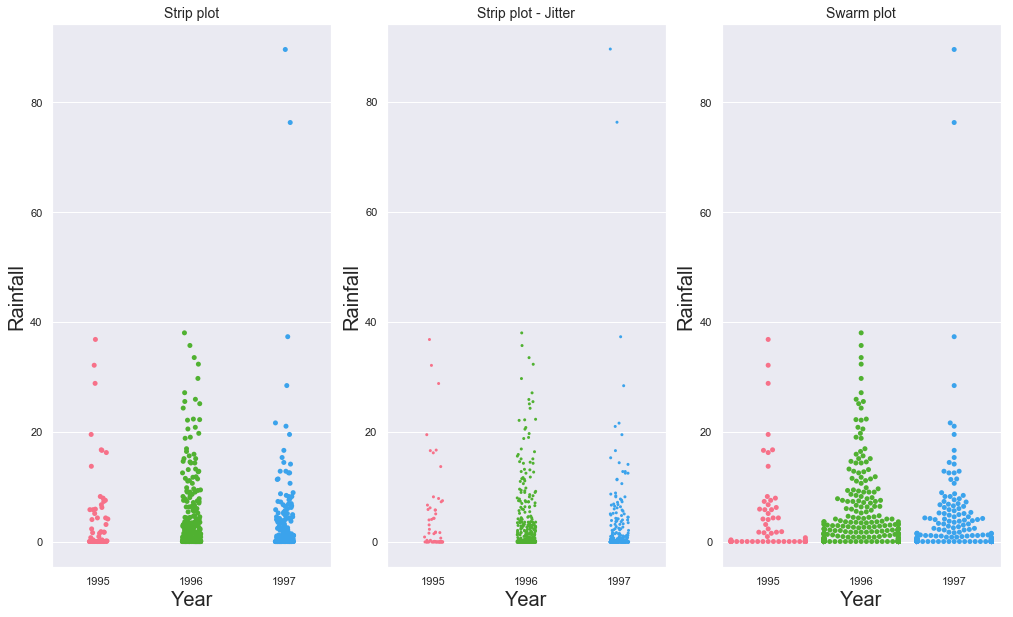

In [26]:
%matplotlib inline

fig, ax = plt.subplots(1,3, figsize=(17,10))

plot0 = sns.stripplot(x='year', y ='rain', data=df,   ax=ax[0])
plot1 = sns.stripplot(x='year', y ='rain', data=df, jitter=True, size=3, ax=ax[1])


# plot swarmplot
plot = sns.swarmplot(x='year', y ='rain', data=df, ax=ax[2])

# titles
plot0.set_title('Strip plot',fontsize=14)
plot1.set_title('Strip plot - Jitter',fontsize=14)
plot.set_title('Swarm plot',fontsize=14)

#labels
plot0.set_ylabel('Rainfall',fontsize=20)
plot0.set_xlabel('Year',fontsize=20)
plot1.set_ylabel('Rainfall',fontsize=20)
plot1.set_xlabel('Year',fontsize=20)
plot.set_ylabel('Rainfall',fontsize=20)
plot.set_xlabel('Year',fontsize=20)

# show plot
plt.show()




### The notched box plot

Another alternative to the box plot is the notched box plot which works the same as the standard Box Plot but has a narrowing of the box around the median value. This is helpful when comparing the differenced across a data series.



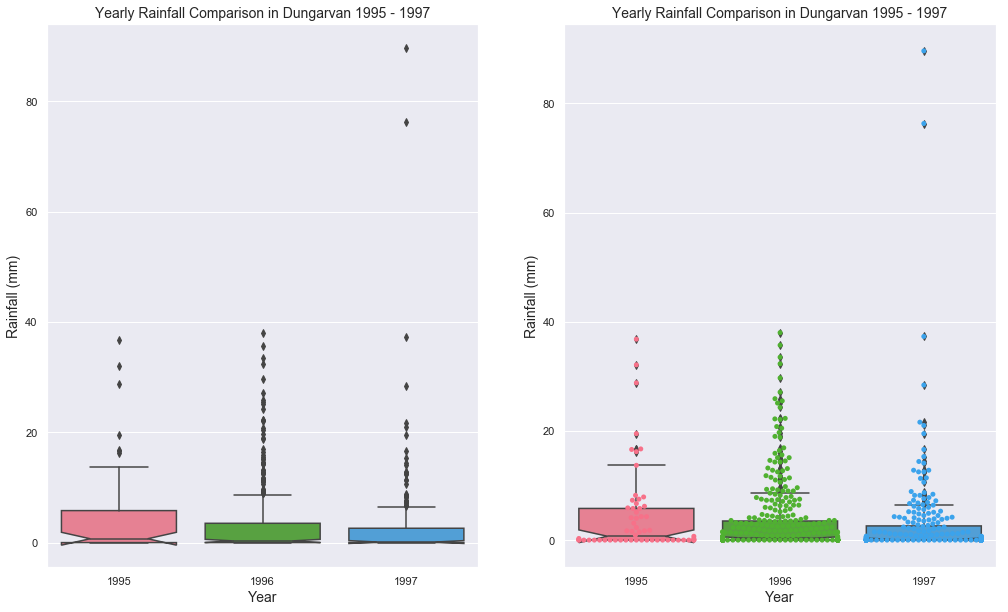

In [27]:
%matplotlib inline

fig, ax = plt.subplots(1,2, figsize=(17,10))
 
# Add notch
plot = sns.boxplot( x='year', y ='rain', data=df, notch=True,  ax=ax[0])

# notch and swarmplot
plot2 = sns.boxplot( x='year', y ='rain', data=df, notch=True,  ax=ax[1])
plot2 = sns.swarmplot(x='year', y ='rain', data=df,  ax=ax[1])

# title
plot.set_title('Yearly Rainfall Comparison in Dungarvan 1995 - 1997',fontsize=14)
plot2.set_title('Yearly Rainfall Comparison in Dungarvan 1995 - 1997',fontsize=14)

#labels
plot.set_ylabel('Rainfall (mm)',fontsize=14)
plot.set_xlabel('Year',fontsize=14)
plot2.set_ylabel('Rainfall (mm)',fontsize=14)
plot2.set_xlabel('Year',fontsize=14)

# show plot
plt.show()


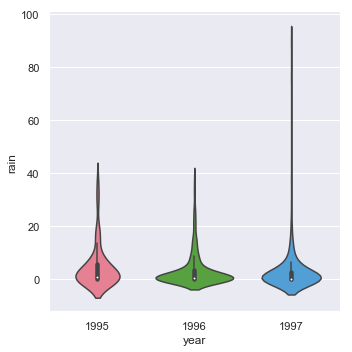

In [28]:
# https://seaborn.pydata.org/generated/seaborn.catplot.html
g = sns.catplot(x="year", y="rain",  data=df, kind="violin")

# References

https://en.wikipedia.org/wiki/Box_plot
    
http://theta.edu.pl/wp-content/uploads/2012/10/exploratorydataanalysis_tukey.pdf

http://vita.had.co.nz/papers/boxplots.pdf


https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch12/5214889-eng.htm

https://chrisalbon.com/python/data_wrangling/pandas_group_data_by_time/

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.strftime.html

https://www.khanacademy.org/math/ap-statistics/summarizing-quantitative-data-ap/stats-box-whisker-plots/v/reading-box-and-whisker-plots

https://www.wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots

https://chartio.com/resources/tutorials/what-is-a-box-plot/

http://biostat.mc.vanderbilt.edu/wiki/pub/Main/TatsukiRcode/Poster3.pdf
    
https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial

https://en.wikipedia.org/wiki/Violin_plot

https://stackoverflow.com/questions/33381330/histogram-with-boxplot-above-in-python